# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
#adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
#WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
#bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. I have chosen to go with the airbnb listing Dataset
2. In this problem, I will be trying to predict the price of an listed airbnb. So the 'price' will be my label. 
3. This will be a regression supervised learning problem. 
4. My initial features will include accommodates, room_type, bathrooms, bedrooms, beds, review_scores_rating, review_scores_cleanliness, review_scores_checkin, review_scores_location, review_scores_value.
5. With a model that predicts the price of the airbnb listings, the hosts can make more profit by listing their houses on a competitive price rather than underselling or overselling their houses. Additionally, wealthy customers will likely pay higher prices for listings that really deserve its listed price. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. Data Prep Techniques: Handling missing values, replacing outliers, One hot encoding for the room_type, removing irrelevant features
2. I will be using Linear Regression adn Random Forest ensemble model
3. I will get the RSME and R^2 scores of the model and try to get a low RSME and high R^2 scores.

In [3]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [4]:
df.corr()['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.519057
bedrooms                                        0.475506
beds                                            0.409236
bathrooms                                       0.331297
availability_60                                 0.152750
availability_90                                 0.148228
availability_30                                 0.146895
availability_365                                0.123984
maximum_maximum_nights                          0.107901
review_scores_location                          0.096610
maximum_nights_avg_ntm                          0.081589
review_scores_cleanliness                       0.081402
host_total_listings_count                       0.080995
host_listings_count                             0.080995
minimum_maximum_nights                          0.064011
has_availability                                0.062182
number_of_reviews_ltm          

In [5]:
#Check for null values
np.sum(df.isnull())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

1. After analyzing the data, I decided to remove some of the features, as I saw that there were negative or even little to no correlation and that it wasn't a nesessary feature in order to determine my label.
   My new feature list contains following features: 'accommodates', 'room_type', 'bathrooms', 'bedrooms', 'beds'.

2. Data Prep Techniques: Handling missing values, replacing outliers, One hot encoding for the room_type, removing irrelevant features.
3. I will be using Linear Regression and Random Forest ensemble model initially and then if I need to, I will try to add additional models to compare depending on my results.
4. I will be splitting the data to training and testing sets. I will also tune the hyperparameters maybe if i need to, I will also adjust my features to improve the overall performance of the model. 


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# YOUR CODE HERE
features = ['accommodates', 'room_type', 'bathrooms', 'bedrooms', 'beds']

In [8]:
df[features].describe()

,accommodates,bathrooms,bedrooms,beds
count,28022.000000,28022.000000,25104.000000,26668.000000
mean,2.874491,1.142174,1.329708,1.629556
std,1.860251,0.421132,0.700726,1.097104
min,1.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,2.000000
max,16.000000,8.000000,12.000000,21.000000


#Cleaning the data

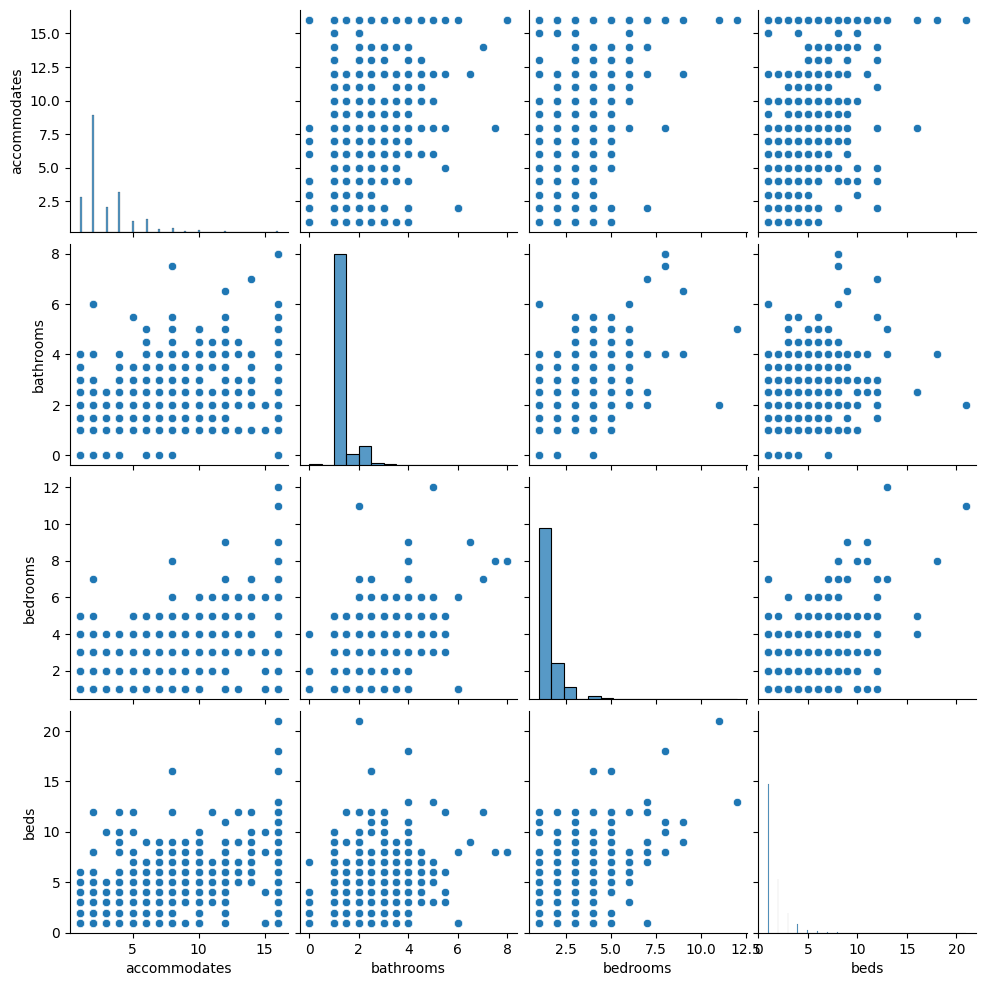

In [9]:
#Check for outlier 
sns.pairplot(df[features])
plt.show()

In [10]:
#Handle Outliers 

#!!!! I got better results without winsorizing

# df['bathrooms'] = stats.mstats.winsorize(df['bathrooms'], limits=[0.01, 0.01])
# df['bedrooms'] = stats.mstats.winsorize(df['bedrooms'], limits=[0.01, 0.01])
# df['beds'] = stats.mstats.winsorize(df['beds'], limits=[0.01, 0.01])

# df[features].describe()

In [11]:
#Missing Data
print(np.sum(df[features].isnull(), axis=0))
has_na = ['bedrooms', 'beds']

accommodates       0
room_type          0
bathrooms          0
bedrooms        2918
beds            1354
dtype: int64


In [12]:
#Keep record of the missingness
for column in has_na: 
    df[column + '_na'] = df[column].isnull()

In [13]:
#Replacing missing values with mean values of column
for column in has_na: 
    df[column].fillna(value=df[column].mean(), inplace=True)

print(np.sum(df[features].isnull(), axis=0))

accommodates    0
room_type       0
bathrooms       0
bedrooms        0
beds            0
dtype: int64


In [14]:
#One hot encoding for the room_type
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [15]:
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type')
df_room_type

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [16]:
df = df.join(df_room_type)
df.drop(columns='room_type', inplace=True)
df

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,bedrooms_na,beds_na,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,0,0,0.33,9,True,False,1,0,0,0
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,0,0,4.86,6,False,False,1,0,0,0
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,0,0,0.02,3,False,False,1,0,0,0
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,1,0,3.68,4,False,False,0,0,1,0
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,1,0,0.87,7,False,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,Astoria Luxury suite 2A,THIS LOVELY HOME IS THE SPACIOUS SUITE WITH PR...,NaN,Vicky,"Queens, New York, United States",NaN,1.00,1.00,True,8.0,...,8,0,1.00,2,False,False,0,0,1,0
28018,Newly renovated suite in the heart of Williams...,Just fully renovated from head to toe. On the ...,NaN,Samuel,"New York, New York, United States","Hello, my name is Sam. I am a real estate prof...",0.91,0.89,True,0.0,...,0,0,2.00,5,False,False,1,0,0,0
28019,Perfect Room to Stay in Brooklyn! Near Metro!,"Amazing and comfortable space in Brooklyn, sam...",NaN,Carlos,US,NaN,0.99,0.99,True,6.0,...,7,0,1.00,2,False,False,0,0,1,0
28020,New Beautiful Modern One Bedroom in Brooklyn,This stylish place to stay is perfect for a gr...,NaN,Lexia,"New York, New York, United States","I am a graphic designer, swell chaser and duri...",0.90,1.00,True,3.0,...,0,0,1.00,7,False,False,1,0,0,0


In [17]:
#Re adjusting the features
features.remove('room_type')
features

['accommodates', 'bathrooms', 'bedrooms', 'beds']

In [18]:
features.extend(df_room_type.columns)
features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room']

In [19]:
df[features]

,accommodates,bathrooms,bedrooms,beds,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,1.0,1.329708,1.0,1,0,0,0
1,3,1.0,1.000000,3.0,1,0,0,0
2,4,1.5,2.000000,2.0,1,0,0,0
3,2,1.0,1.000000,1.0,0,0,1,0
4,1,1.0,1.000000,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...
28017,2,1.0,1.000000,1.0,0,0,1,0
28018,6,1.0,2.000000,2.0,1,0,0,0
28019,2,2.0,1.000000,1.0,0,0,1,0
28020,3,1.0,1.000000,2.0,1,0,0,0


In [20]:
#Check for correlation between featurse and the label
corrs = df[features].corrwith(df['price'])
print(corrs)

accommodates                 0.519057
bathrooms                    0.331297
bedrooms                     0.457171
beds                         0.400325
room_type_Entire home/apt    0.346902
room_type_Hotel room         0.127915
room_type_Private room      -0.355462
room_type_Shared room       -0.047938
dtype: float64


In [21]:
#Scaler for the price data
scaler = StandardScaler()

df['price_scaled'] = scaler.fit_transform(df['price'].values.reshape(-1, 1))

In [22]:
#Label and feature, then splitting
y = df['price_scaled']
X = df[features]

In [23]:
#Create a test set that is 30% of the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1234)

#Linear Regression Model

In [24]:
#Training the data with Linear Regression
lr_model = LinearRegression()     
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Predictions
y_lr_pred = lr_model.predict(X_test)

# Create a DataFrame with actual and predicted prices
lr_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_lr_pred})

# Display the first few rows of the DataFrame
print(lr_results.head(20))

         Actual  Predicted
17758  1.638836   1.270996
19492 -0.811203  -0.051514
12485 -0.243078   0.034424
14553 -0.292789  -0.091309
13532 -0.527140   0.245850
1059  -0.512937  -0.434570
20303  0.097797   0.203125
9808  -0.775695  -0.453125
23496 -0.683374  -0.621826
24551  0.112001   0.869385
16979  1.745360  -0.478516
19417  0.680125   1.522705
21948 -0.385109  -0.453125
23952  0.680125  -0.115967
3854  -0.562648  -0.612061
9010  -0.669171   0.245850
3667   0.183016  -0.201416
20860 -0.030031   0.869385
3977   6.006297   2.503906
7612   0.886071   0.034424


In [26]:
# 1. Compute the RMSE using mean_squared_error()
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)


# 2. Compute the R2 score using r2_score()
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.8295217454596878
[LR] R2: 0.34824421201732136


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Model

In [27]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [8, 16, 32],
}

In [28]:
#Training the data with Random Forest
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


In [29]:
#Predictions
y_rf_pred = best_rf.predict(X_test)

# Create a DataFrame with actual and predicted prices
rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred})

# Display the first few rows of the DataFrame
print(rf_results.head(20))

         Actual  Predicted
17758  1.638836   1.130447
19492 -0.811203  -0.561747
12485 -0.243078   0.022546
14553 -0.292789   0.028524
13532 -0.527140   0.137843
1059  -0.512937  -0.218615
20303  0.097797   0.123644
9808  -0.775695  -0.433486
23496 -0.683374  -0.601163
24551  0.112001   0.558025
16979  1.745360  -0.447924
19417  0.680125   1.484157
21948 -0.385109  -0.433486
23952  0.680125   0.203515
3854  -0.562648  -0.605029
9010  -0.669171   0.137843
3667   0.183016   0.074444
20860 -0.030031   0.558025
3977   6.006297   3.059278
7612   0.886071   0.022546


In [30]:
#Compute RMSE
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

#Compute R2 Score
rf_r2 = r2_score(y_test, y_rf_pred)

print('RF - Root Mean Squared Error: {0}'.format(rf_rmse))
print('RF - R2: {0}'.format(rf_r2))   

RF - Root Mean Squared Error: 0.792396312064061
RF - R2: 0.4052776809402321


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results: 

In this analysis, I developed and evaluated Linear Regression (LR) and Random Forest (RF) models to predict Airbnb listing prices. The Random Forest model performed better, with an RMSE of 0.7920 and an R² of 0.4058, compared to the Linear Regression model's RMSE of 0.8295 and R² of 0.3482. While the Random Forest model showed improved accuracy, the relatively low R² scores suggest that there is room for further enhancement through additional feature engineering and model refinement.